# Telecom Churns Prediction Machine Learning

Project Report by Allentine Paulis

# Table of Contents 
* [Project Description](#description)
* [Data](#data)
* [Step 1. Understanding Data](#understanding)
* [Step 2. Work Plan](#plan)
* [Step 3. Data Preprocessing](#preprocessing)
* [Step 4. EDA](#eda)
* [Step 5. Check Clustering](#cluster)
* [Step 6. Train Machine Learning Model](#modeltrain)   
* [Step 7. Improve Machine Learning model Quality](#improve)
* [Step 8. Final Testing](#test)
* [Step 9. Overall conclusion](#allconclusion)

# Project Description <a class="anchor" id="description"></a>

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

**Interconnect's services**

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.

2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.


Some other services the company provides include:


- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

# Data <a class="anchor" id="data"></a>

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

# Step 1. Understanding Data <a class="anchor" id="understanding"></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.cluster import KMeans

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMRegressor

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score 
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, StandardScaler


In [3]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_phone    = pd.read_csv('/datasets/final_provider/phone.csv')

## Contract Data

In [4]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [6]:
df_contract.describe(include='all')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,7043,77,5,3,2,4,NaN,6531
top,7025-IWFHT,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,366,5174,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [7]:
df_contract.duplicated().sum()

0

In [8]:
df_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [9]:
# Unique customer id
len(df_contract['customerID'].unique())

7043

In [10]:
# Unique EndDate
df_contract['EndDate'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

In [11]:
df_contract['EndDate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

There are 5174 contracts that doesn't left the company.

In [12]:
print('The customers who left the company ', round((7043-5174)/7043*100,2), '%')

The customers who left the company  26.54 %


## Personal Data

In [13]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [15]:
df_personal.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,7025-IWFHT,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN


In [16]:
df_personal.duplicated().sum()

0

In [17]:
df_personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [18]:
# Unique customer id
len(df_personal['customerID'].unique())

7043

## Internet Data

In [19]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [20]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


In [21]:
df_internet.describe(include='all')

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,8337-UPOAQ,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [22]:
df_internet.duplicated().sum()

0

In [23]:
df_internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [24]:
# Unique customer id
len(df_internet['customerID'].unique())

5517

## Phone Data

In [25]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [26]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


In [27]:
df_phone.describe(include='all')

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,7025-IWFHT,No
freq,1,3390


In [28]:
df_phone.duplicated().sum()

0

In [29]:
df_phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

In [30]:
# Unique customer id
len(df_phone['customerID'].unique())

6361

## Conclusion

- no duplicated values
- no missing values 
- Some columns have only 2 values (Yes/No, Month/Year, ect). This data will be turned on numeric for example [1,-1] to make it easier to be seen and trained.
- some data type needs to be converted:
    - datetime : BeginDate, EndDate
    - floats: TotalCharges
    - binary: PaperlessBilling, PaymentMethod, gender, SeniorCitizen, Partner, Dependents, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, MultipleLines
    - group classification: Type, PaymentMethod
- The customers who left the company is 26.5%
- The number of unique customers ID varies, so when we join the tables, null data can be produced.

- Some columns might be irrelevant such as PaperlessBilling, PaymentMethod
- Need more exploration to understand the data: TotalCharges ( how is the charge process and how much it costs), SeniorCitizen (which age), Partner, Dependents
- Need to check how many members join each month, is there trend or seasonable


# Step 2. Work Plan <a class="anchor" id="plan"></a>

**1. Data Preprocessing:**
- Convert the data types
- Join tables based on customerID.
- Arrange the join database, with null parameters that will be found.
- Create the target column.

**2. EDA:**
- Visualization histogram or density graphs
- Check correlations between parameters and the target.
- Explore the datetime parameters to check a trend of customer joining and leaving.
- Check for irrelevant columns and discarding them.

**3. Clustering**
- Check any clustering for the data and customer who leave.

**4. Training models:**
- Create graphs and functions to test and compare the models qualities.
- Balance the data before training.
- Split the data to training, validation and test.
- Training models

**5. Improve Machine Learning model Quality:**
- Check Hyperparameters.
- Check Cross Validation
- Compare the models, choosing the best one 

**6. Final Testing**
- run the model over the test data.

# Step 3. Data Preprocessing <a class="anchor" id="preprocessing"></a>

- Join tables based on customerID

In [31]:
df = df_contract.copy()
df = df.join(df_personal.set_index('customerID'), on='customerID')
df = df.join(df_internet.set_index('customerID'), on='customerID')
df = df.join(df_phone.set_index('customerID'), on='customerID')

<div class="alert alert-success">
    <b>Reviewer's comment</b><br>
    Dataframes were merged correctly!
</div>

In [32]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
MultipleLines       6361 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 1.1+ MB


In [34]:
df.describe(include='all')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,5517,5517,5517,5517,5517,5517,5517,6361
unique,7043,77,5,3,2,4,NaN,6531,2,NaN,2,2,2,2,2,2,2,2,2,2
top,7025-IWFHT,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,20.2,Male,NaN,No,No,Fiber optic,No,No,No,No,No,No,No
freq,1,366,5174,3875,4171,2365,NaN,11,3555,NaN,3641,4933,3096,3498,3088,3095,3473,2810,2785,3390
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,0.162147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,0.368612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.duplicated().sum()

0

In [36]:
df.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [37]:
df.isna().sum()/len(df) * 100

customerID           0.000000
BeginDate            0.000000
EndDate              0.000000
Type                 0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
InternetService     21.666903
OnlineSecurity      21.666903
OnlineBackup        21.666903
DeviceProtection    21.666903
TechSupport         21.666903
StreamingTV         21.666903
StreamingMovies     21.666903
MultipleLines        9.683374
dtype: float64

The missing values are 21%, too much to drop. We can assume the null values are 'No' or 0 since 'No' is 'No' is the majority answer on all the columns that have null. Another argument in favor of treating null values as No/0 is that there were no missing values in the original dataframes, and they appeared only after the merge, which leads to a conclusion that for example people who don't appear in the internet dataframe just don't use internet services, etc.

In [38]:
df = df.fillna('No')

In [39]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
MultipleLines       7043 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 1.1+ MB


In [41]:
df.describe(include='all')

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
count,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,77,5,3,2,4,NaN,6531,2,NaN,2,2,3,2,2,2,2,2,2,2
top,7025-IWFHT,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,20.2,Male,NaN,No,No,Fiber optic,No,No,No,No,No,No,No
freq,1,366,5174,3875,4171,2365,NaN,11,3555,NaN,3641,4933,3096,5024,4614,4621,4999,4336,4311,4072
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,0.162147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,0.368612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

- Convert the data types

dates

In [43]:
import datetime

df['BeginDate'] =  pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')
df['BeginYear'] = pd.DatetimeIndex(df['BeginDate']).year
df['BeginMonth'] = pd.DatetimeIndex(df['BeginDate']).month
df = df.drop(columns = 'BeginDate', axis=1)

float

In [44]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

binary

In [45]:
df['gender'] = df['gender'].map({'Female': 1, 'Male': -1})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': -1})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': -1})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': -1})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': -1})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': -1})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': -1})
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': -1})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': -1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': -1})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': -1})
df['Type'] = df['Type'].map({'Month-to-month': 1, 'One year': 2, 'Two year': 3})
df['InternetService'] = df['InternetService'].map({'DSL': 1, 'Fiber optic': 2, 'No': 3})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 1,
                                               'Mailed check': 1,
                                               'Bank transfer (automatic)': -1,
                                               'Credit card (automatic)': -1})

In [46]:
df.head()

,customerID,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,BeginYear,BeginMonth
0,7590-VHVEG,No,1,1,1,29.85,29.85,1,0,1,...,1,-1,1,-1,-1,-1,-1,-1,2020,1
1,5575-GNVDE,No,2,-1,1,56.95,1889.50,-1,0,-1,...,1,1,-1,1,-1,-1,-1,-1,2017,4
2,3668-QPYBK,2019-12-01 00:00:00,1,1,1,53.85,108.15,-1,0,-1,...,1,1,1,-1,-1,-1,-1,-1,2019,10
3,7795-CFOCW,No,2,-1,-1,42.30,1840.75,-1,0,-1,...,1,1,-1,1,1,-1,-1,-1,2016,5
4,9237-HQITU,2019-11-01 00:00:00,1,1,1,70.70,151.65,1,0,-1,...,2,-1,-1,-1,-1,-1,-1,-1,2019,9


- Create the target column, 
customers who left will be mark as 1 at churn column

In [47]:
df['Churn'] = df['EndDate'].apply(lambda x: 0 if x=='No' else 1)
df_copy = df.copy()
df = df.drop(columns = 'EndDate', axis=1)

In [48]:
df.head()

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,BeginYear,BeginMonth,Churn
0,7590-VHVEG,1,1,1,29.85,29.85,1,0,1,-1,...,-1,1,-1,-1,-1,-1,-1,2020,1,0
1,5575-GNVDE,2,-1,1,56.95,1889.50,-1,0,-1,-1,...,1,-1,1,-1,-1,-1,-1,2017,4,0
2,3668-QPYBK,1,1,1,53.85,108.15,-1,0,-1,-1,...,1,1,-1,-1,-1,-1,-1,2019,10,1
3,7795-CFOCW,2,-1,-1,42.30,1840.75,-1,0,-1,-1,...,1,-1,1,1,-1,-1,-1,2016,5,0
4,9237-HQITU,1,1,1,70.70,151.65,1,0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,2019,9,1


# Step 4.EDA <a class="anchor" id="eda"></a>

- Visualization histogram or density graphs

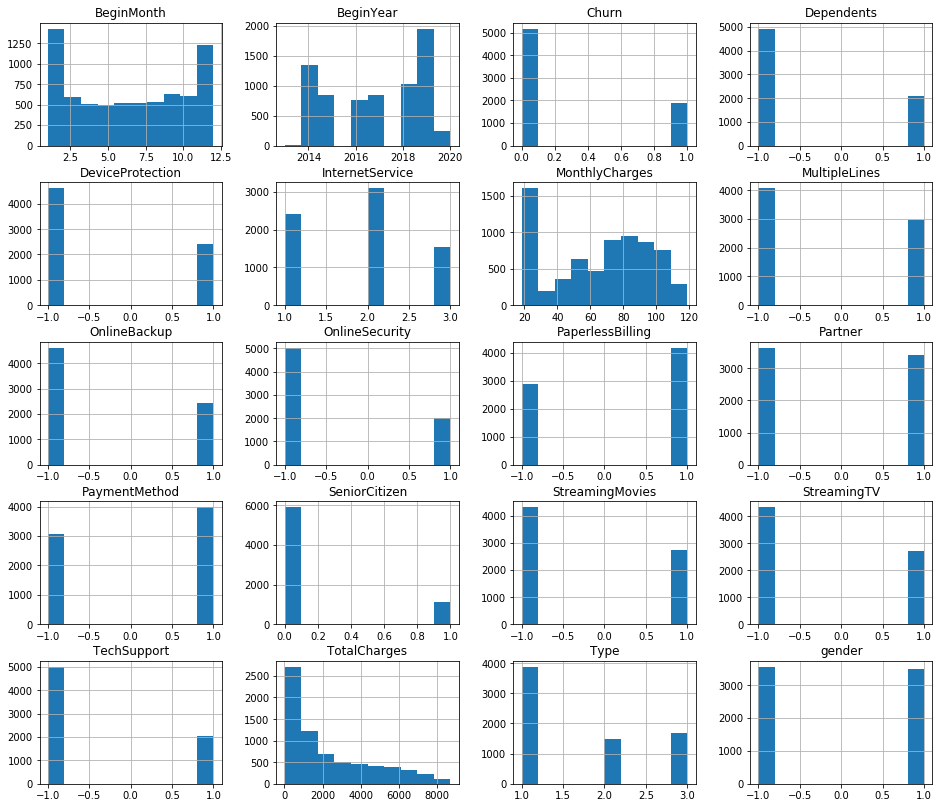

In [49]:
df = df
temp_df=df.copy()
fig = plt.figure(figsize = (16,14))
ax = fig.gca()
temp_df.hist(ax = ax)
fig = ax.get_figure()

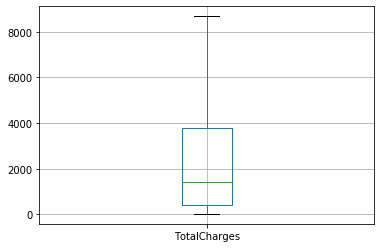

In [50]:
df.boxplot(column='TotalCharges')

- Customers usually join at months of January and December (end or the beginning of the year).
- In 2019 there was an increase in new customers.
- The 'gender' and 'Partner' are balanced.
- Most of the services are taken by less than half of the customers.
- 'TotalCharges' is right skewed distribution. The median is lower than the mean, most of the customers pay low prices.

- Check correlations between parameters and the target.

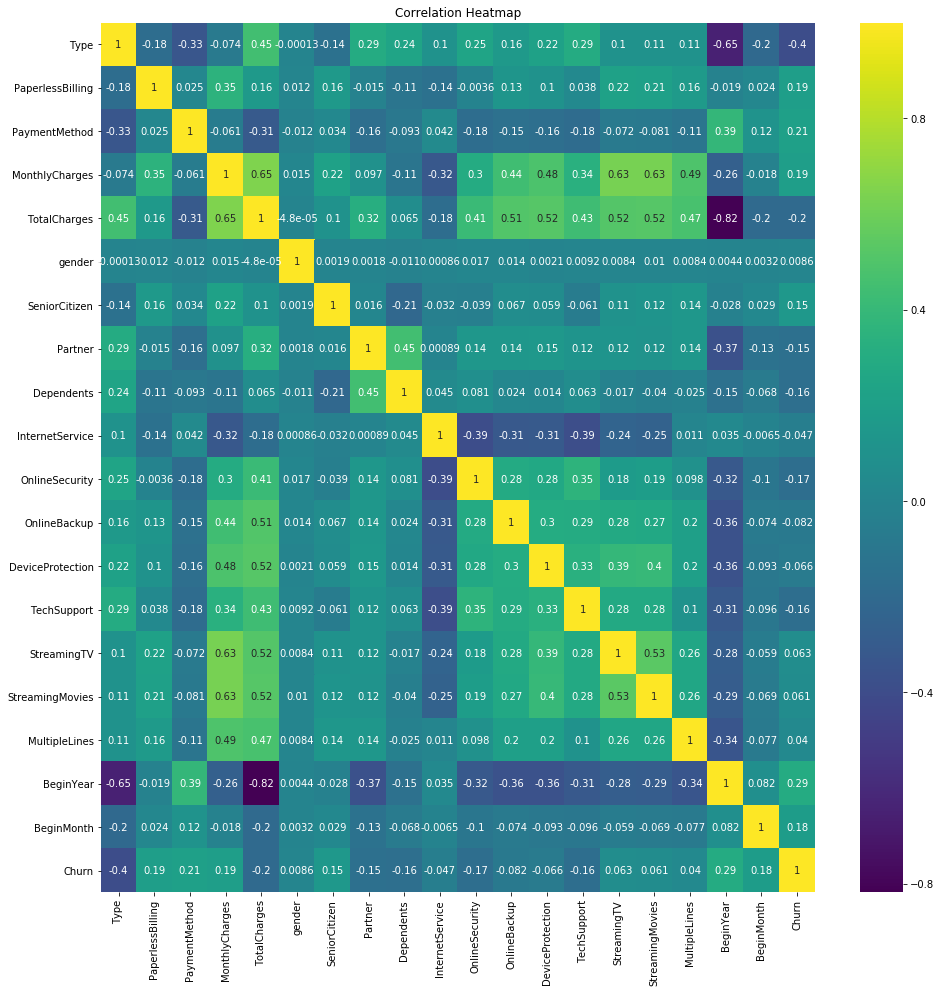

In [51]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

In [52]:
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
BeginYear           0.291621
PaymentMethod       0.209902
MonthlyCharges      0.193356
PaperlessBilling    0.191825
BeginMonth          0.181417
SeniorCitizen       0.150889
StreamingTV         0.063228
StreamingMovies     0.061382
MultipleLines       0.040102
gender              0.008612
InternetService    -0.047291
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
TotalCharges       -0.199428
Type               -0.396713
Name: Churn, dtype: float64

- there is pretty good positive correlation between Churn and BeginYear and PaymentMethod
- there is pretty good negative correlation between Churn and Type and TotalCharges

-  Looking for irrelevant columns

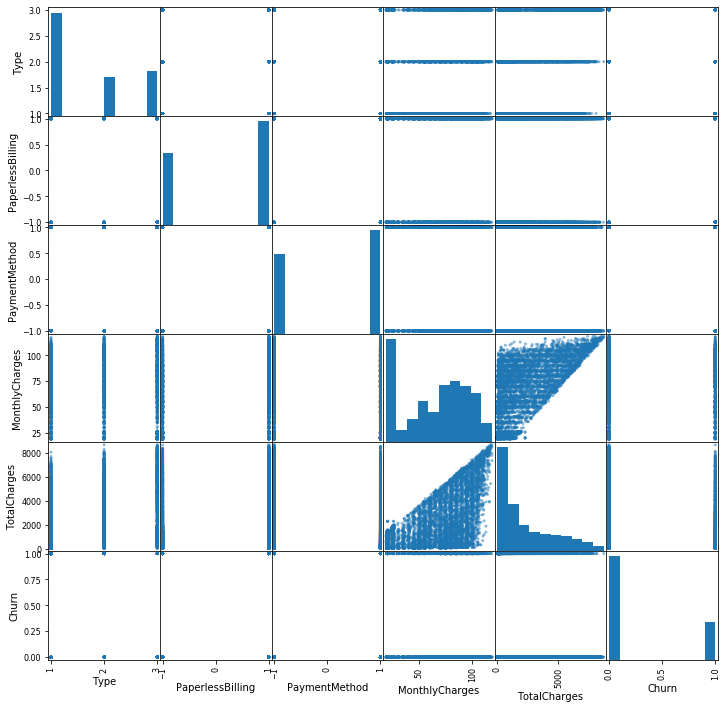

In [53]:
plot_1 = df.drop(columns=['customerID','gender','SeniorCitizen',
                              'Partner','Dependents','InternetService','OnlineSecurity',
                              'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                              'StreamingMovies','MultipleLines','BeginYear','BeginMonth'], axis=1)
pd.plotting.scatter_matrix(plot_1, figsize=(12, 12))
plt.show()

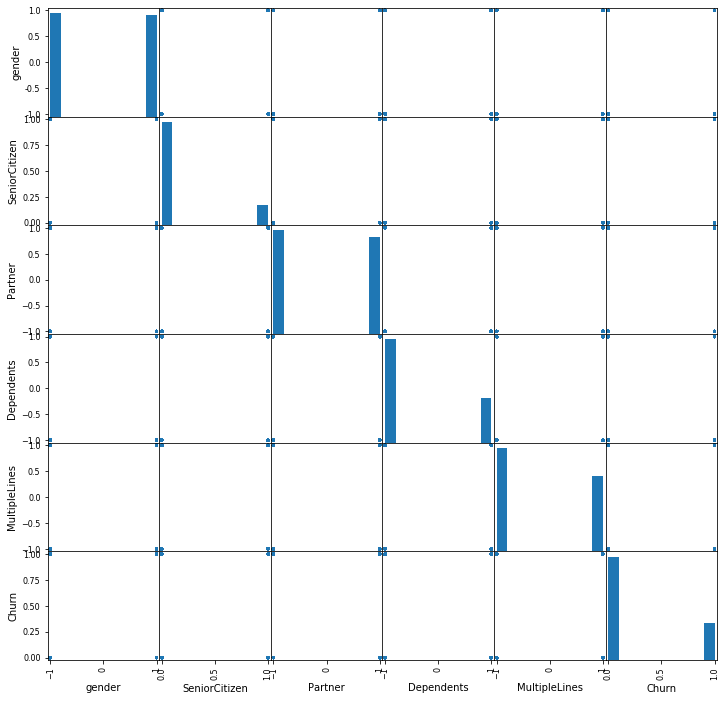

In [54]:
plot_2 = df.drop(columns=['customerID','Type','PaperlessBilling','PaymentMethod',
                              'MonthlyCharges','TotalCharges','InternetService','OnlineSecurity',
                              'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                              'StreamingMovies','BeginYear','BeginMonth'], axis=1)
pd.plotting.scatter_matrix(plot_2, figsize=(12, 12))
plt.show()

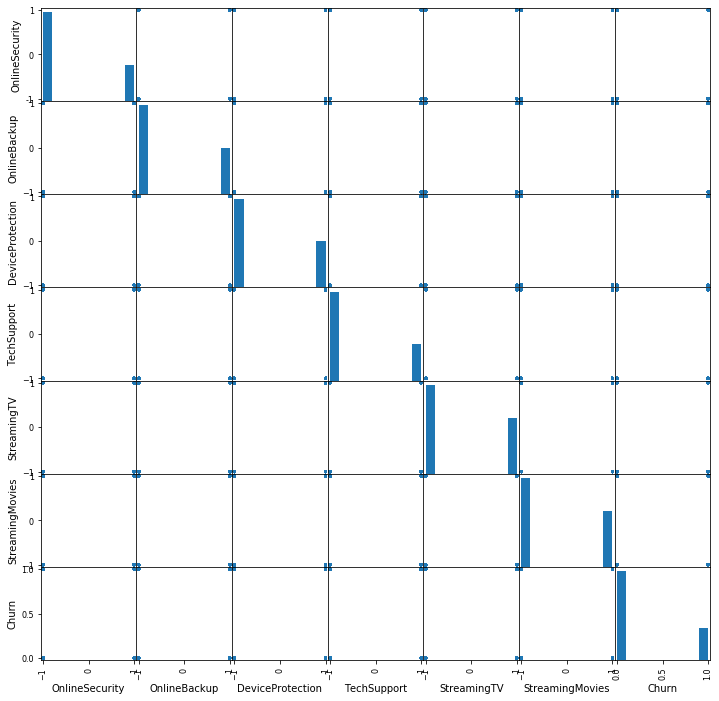

In [55]:
plot_3 = df.drop(columns=['customerID','Type','PaperlessBilling','PaymentMethod',
                              'MonthlyCharges','TotalCharges','gender','SeniorCitizen',
                              'Partner','Dependents','InternetService',
                              'MultipleLines','BeginYear','BeginMonth'], axis=1)
pd.plotting.scatter_matrix(plot_3, figsize=(12, 12))
plt.show()

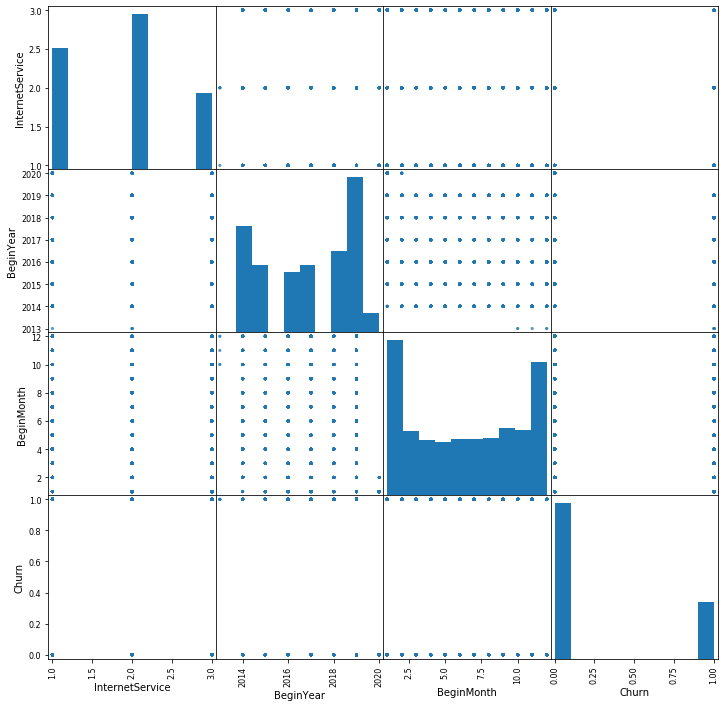

In [56]:
plot_4 = df.drop(columns=['customerID','Type','PaperlessBilling','PaymentMethod',
                              'MonthlyCharges','TotalCharges','gender','SeniorCitizen',
                              'Partner','Dependents','OnlineSecurity','OnlineBackup',
                              'DeviceProtection','TechSupport','StreamingTV',
                              'StreamingMovies','MultipleLines'], axis=1)
pd.plotting.scatter_matrix(plot_4, figsize=(12, 12))
plt.show()

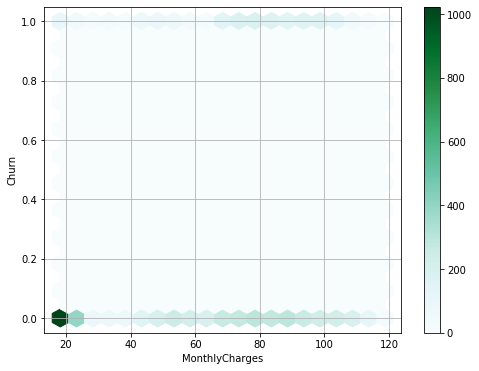

In [57]:
df.plot(x='MonthlyCharges', y='Churn', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.show()

- Many people who pay less the 'MonthlyCharges' and 'TotalCharges' didn't leave the company
- correlation exploration didn't find any special findings or strong one-one correlation with most of features
- Since there are many features, and correlation exploration didn't find any special findings, and entropy doesn't look good for any feature, we will keep all the features, in order to find as many as deep connections between them.

- Explore the datetime parameters to check a trend of customer joinning and leaving.

In [58]:
df_churn = df_copy.groupby(['EndDate']).agg({'Churn':'sum'})
df_churn

,Churn
EndDate,
2019-10-01 00:00:00,458
2019-11-01 00:00:00,485
2019-12-01 00:00:00,466
2020-01-01 00:00:00,460
No,0


In [59]:
df_join_year = df_copy.groupby(['BeginYear']).agg({'Churn':'sum'})
df_join_year

,Churn
BeginYear,
2013,8
2014,98
2015,123
2016,145
2017,199
2018,315
2019,981
2020,0


In [60]:
df_join_month = df_copy.groupby(['BeginMonth']).agg({'Churn':'sum'})
df_join_month

,Churn
BeginMonth,
1,94
2,122
3,107
4,98
5,126
6,132
7,142
8,151
9,257


In [61]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2019-10-01 00:00:00 to No
Data columns (total 1 columns):
Churn    5 non-null int64
dtypes: int64(1)
memory usage: 80.0+ bytes


In [62]:
df_churn.head()

,Churn
EndDate,
2019-10-01 00:00:00,458
2019-11-01 00:00:00,485
2019-12-01 00:00:00,466
2020-01-01 00:00:00,460
No,0


Average of customers left each month: 467.25


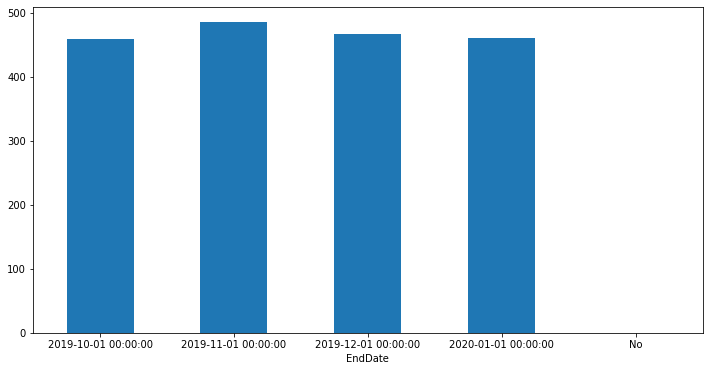

In [63]:
print('Average of customers left each month:', (458+485+466+460)/4)
df_churn.plot(kind='bar', rot=0, figsize=(12,6),legend=False)
plt.show()

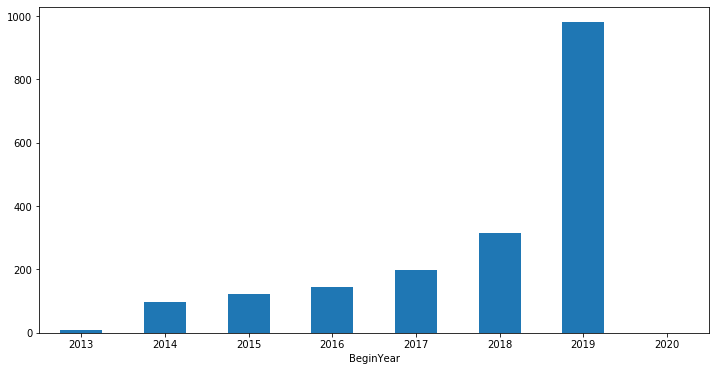

In [64]:
df_join_year.plot(kind='bar', rot=0, figsize=(12,6),legend=False)
plt.show()

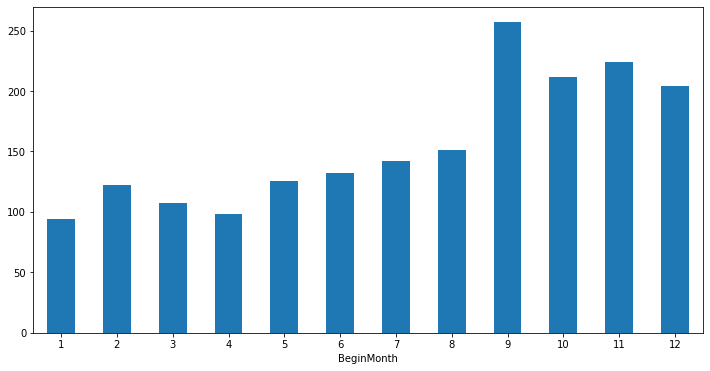

In [65]:
df_join_month.plot(kind='bar', rot=0, figsize=(12,6),legend=False)

Conclusion
- There is a trend of customers joining the company through the years.
- Customers usualy join at the end of the year or beginning of the year, but also is the time of the year where customers left the company.


- The number of customers who leave each month is similar, around 467.
- There is no trend on customers leaving.
- In 2019 many customers started leaving

# Step 5.Check Clustering <a class="anchor" id="cluster"></a>

- Check any clustering for the data and customer who leave.

Objective function:
7941243609.00866
Cluster centroids:
[[ 1.48748991e+00  9.28167877e-02  2.91767554e-01  5.36023002e+01
   9.85030197e+02  3.12348668e-01]
 [ 2.17249641e+00  4.02012458e-01 -2.56348826e-01  9.12619070e+01
   5.36630347e+03  1.53809296e-01]]


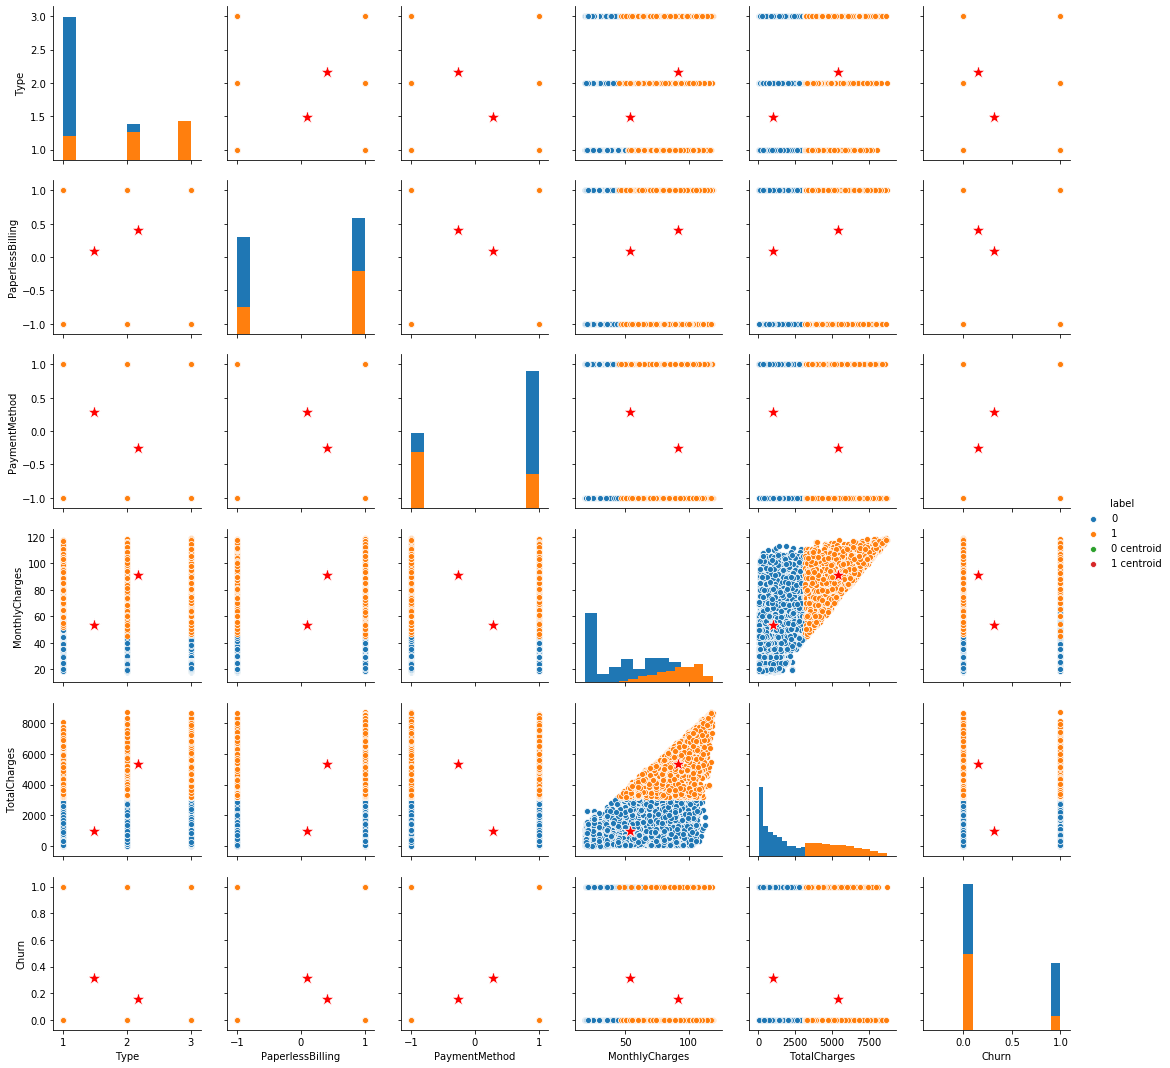

In [66]:
model = KMeans(n_clusters=2, random_state=12345)
model.fit(plot_1)
centroids = pd.DataFrame(model.cluster_centers_, columns=plot_1.columns)
plot_1['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid']

# An index reset is required to create pairgrid.data
data_all = pd.concat([plot_1, centroids], ignore_index=True)
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')

# An additional layer for the centroids
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', color='red')
print("Objective function:")
print(model.inertia_)
print("Cluster centroids:")
print(model.cluster_centers_)

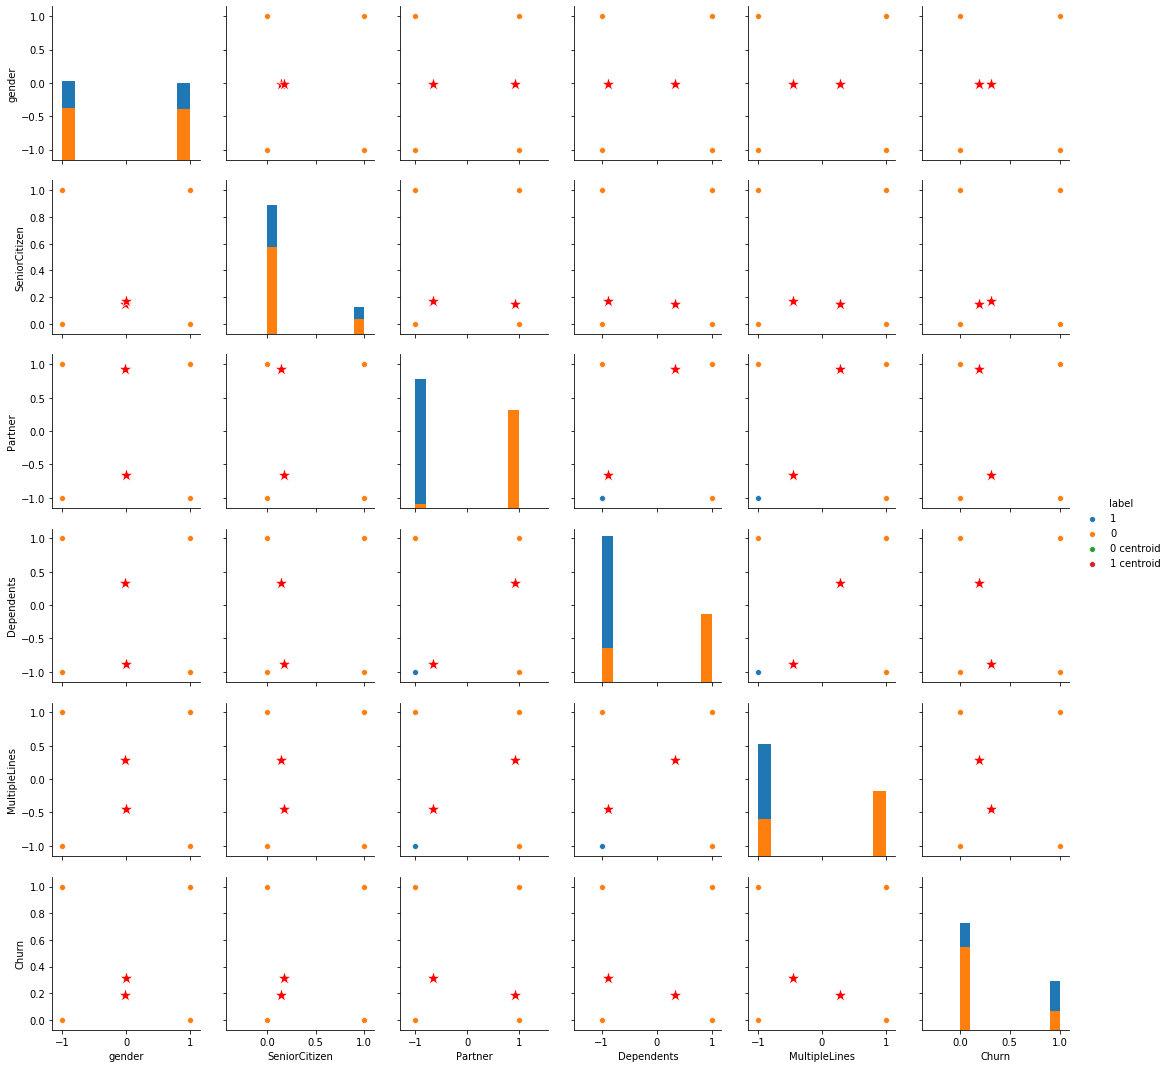

In [67]:
model = KMeans(n_clusters=2, random_state=12345)
model.fit(plot_2)
centroids = pd.DataFrame(model.cluster_centers_, columns=plot_2.columns)
plot_2['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid']

# An index reset is required to create pairgrid.data
data_all = pd.concat([plot_2, centroids], ignore_index=True)
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')

# An additional layer for the centroids
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', color='red')

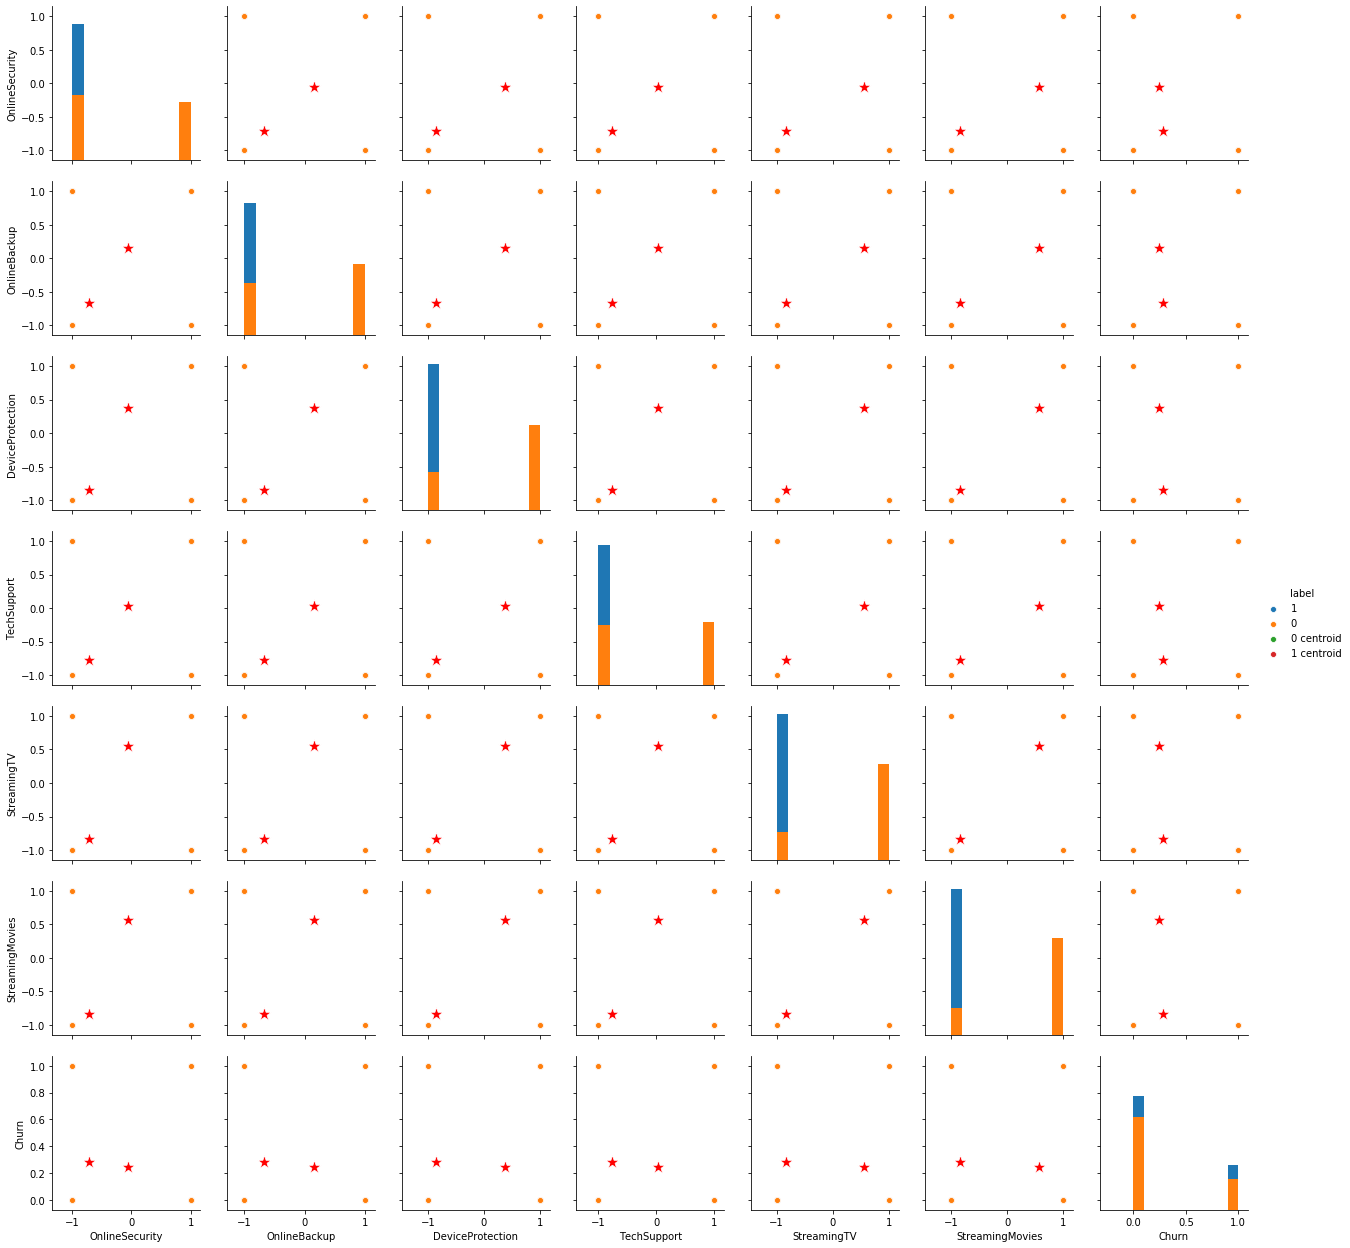

In [68]:
model = KMeans(n_clusters=2, random_state=12345)
model.fit(plot_3)
centroids = pd.DataFrame(model.cluster_centers_, columns=plot_3.columns)
plot_3['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid']

# An index reset is required to create pairgrid.data
data_all = pd.concat([plot_3, centroids], ignore_index=True)
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')

# An additional layer for the centroids
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', color='red')

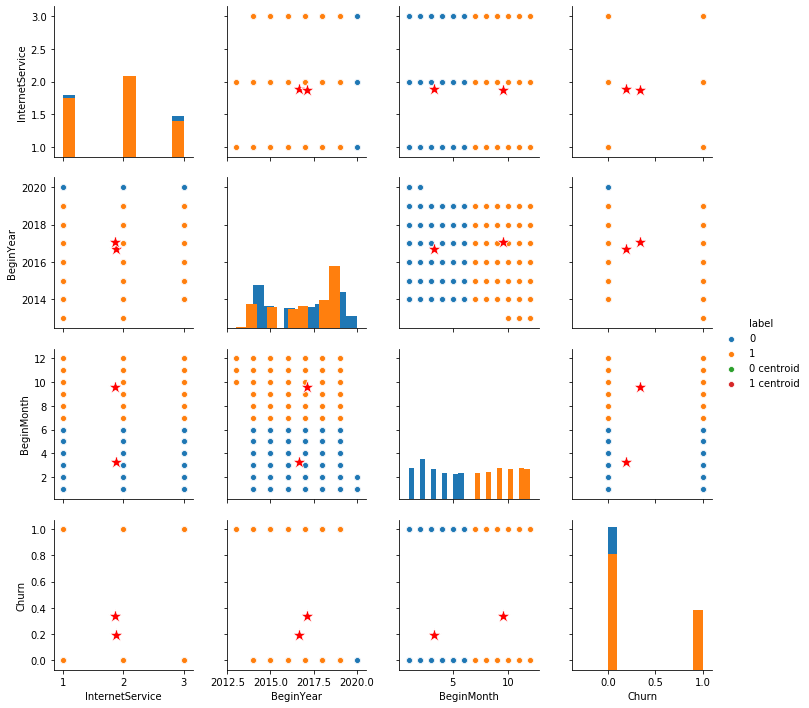

In [69]:
model = KMeans(n_clusters=2, random_state=12345)
model.fit(plot_4)
centroids = pd.DataFrame(model.cluster_centers_, columns=plot_4.columns)
plot_4['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid']

# An index reset is required to create pairgrid.data
data_all = pd.concat([plot_4, centroids], ignore_index=True)
pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')

# An additional layer for the centroids
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', color='red')

Conclusion
- clustering doesn't seem generate good results to separate people who left

# Step 6. Train Machine Learning Models <a class="anchor" id="modeltrain"></a>

 Create graphs and functions to test and compare the models qualities

In [70]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
        
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc
        
        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return roc_auc

 Balance the data before training

In [71]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [72]:
df['Churn'].value_counts()/len(df) * 100

0    73.463013
1    26.536987
Name: Churn, dtype: float64

The target observation is not balanced, target = 0 (customer stayed) is 73.5%, and target = 1 (customer left) is 26.5%. We are going to multiple the observations of the customers left by 3.

In [73]:
target = df['Churn']
features = df.drop(columns=['Churn','customerID'], axis=1)

Split data to training, validation and test

In [74]:
features_1, features_test, target_1, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)

In [75]:
print('features_1',features_1.shape)
print('target_1',target_1.shape)
print('features_train',features_train.shape)
print('target_train',target_train.shape)
print('features_valid',features_valid.shape)
print('target_valid',target_valid.shape)
print('features_test',features_test.shape)
print('target_test',target_test.shape)

features_1 (5282, 19)
target_1 (5282,)
features_train (3961, 19)
target_train (3961,)
features_valid (1321, 19)
target_valid (1321,)
features_test (1761, 19)
target_test (1761,)


upsample the train set

In [76]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

print('features_upsampled',features_upsampled.shape)
print('target_upsampled',target_upsampled.shape)

features_upsampled (6019, 19)
target_upsampled (6019,)


In [77]:
target_upsampled.value_counts()

1    3087
0    2932
Name: Churn, dtype: int64

In [78]:
print('The customers who left the company:',(10781-5174)/10781)

The customers who left the company: 0.5200816250811613


Upsampled Features and Upsampled Target is saved back in features_train, target_train variable

In [79]:
features_train, target_train = features_upsampled, target_upsampled

Train models

In [80]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Classifier', SVC(probability=True)))
models.append(('KNeighbors Classifier', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))

Logistic Regression
          train  test
Accuracy   0.77  0.73
F1         0.78  0.61
APS        0.83  0.62
ROC AUC    0.85  0.82
Logistic Regression ROC-AUC score: 0.8224100935542014
Confusion Matrix: [[688 267]
 [ 91 275]]
--------------------------------------------------------
Support Vector Classifier
          train  test
Accuracy    1.0  0.80
F1          1.0  0.48
APS         1.0  0.67
ROC AUC     1.0  0.79
Support Vector Classifier ROC-AUC score: 0.7880897204817898
Confusion Matrix: [[936  19]
 [245 121]]
--------------------------------------------------------
KNeighbors Classifier
          train  test
Accuracy   0.87  0.68
F1         0.89  0.58
APS        0.93  0.59
ROC AUC    0.95  0.80
KNeighbors Classifier ROC-AUC score: 0.7986910994764398
Confusion Matrix: [[614 341]
 [ 78 288]]
--------------------------------------------------------
Decision Tree Classifier
          train  test
Accuracy    1.0  0.82
F1          1.0  0.65
APS         1.0  0.53
ROC AUC     1.0  0.75
Dec

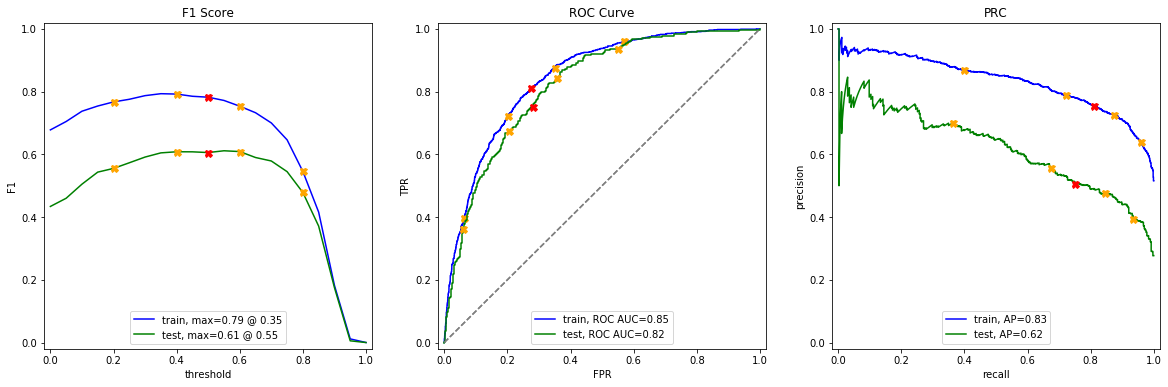

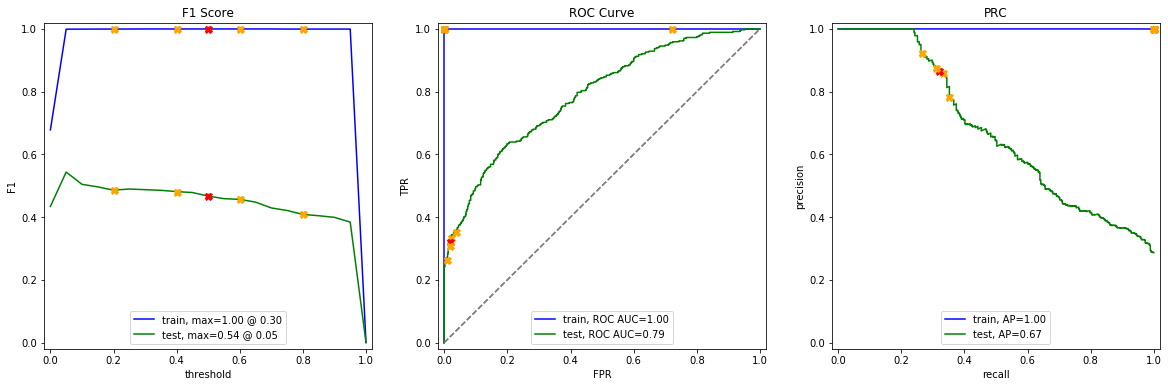

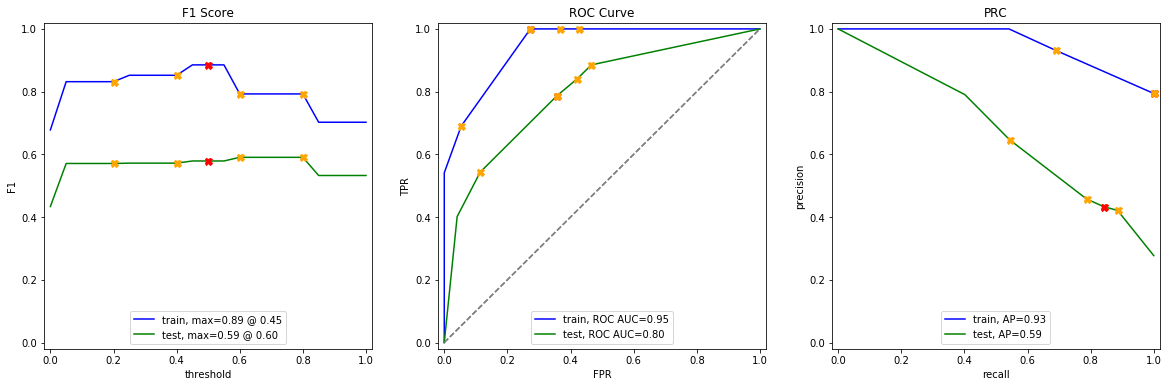

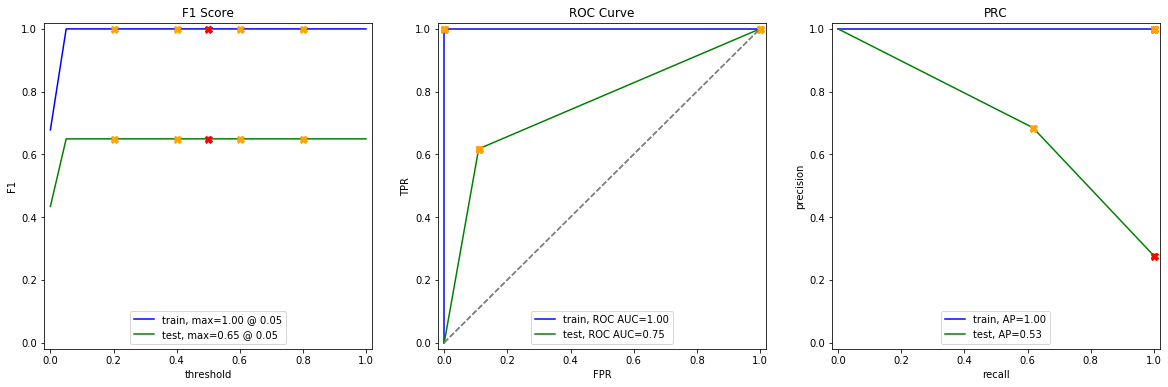

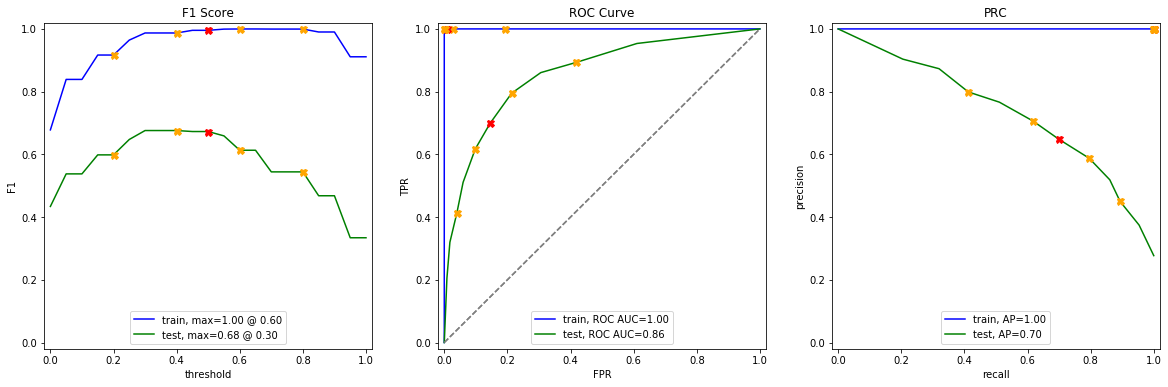

In [81]:
for mod in models:
    name = mod[0]
    model = mod[1]
    print(name)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    roc_auc = evaluate_model(model, features_train, target_train, features_valid, target_valid)
    print(name,'ROC-AUC score:', roc_auc)
    print("Confusion Matrix:",confusion_matrix(target_valid,predicted_valid))
    print('--------------------------------------------------------')

Conclusion
- Random Forest Classifier also has best ROC-AUC score 0.857
- Let's check if we can improve the models

# Step 7. Improve Machine Learning model Quality <a class="anchor" id="improve"></a>

Check Hyperparameters

In [82]:
def val_score (model, features_train, target_train, features_valid, target_valid):
    model = model.fit(features_train, target_train)
    pred_target = model.predict(features_valid)
    pred_proba = model.predict_proba(features_valid)[:, 1]
    roc_auc = metrics.roc_auc_score(target_valid, pred_proba)
    return roc_auc

Logistic Regression

In [83]:
for iter in range(10,61,10):
    model = LogisticRegression(max_iter=iter, random_state=12345)
    score = val_score(model, features_train, target_train, features_valid, target_valid)
    print('Iterations ', iter, '- ROC-AUC score:', score)

Iterations  10 - ROC-AUC score: 0.8115583783938433
Iterations  20 - ROC-AUC score: 0.8224100935542014
Iterations  30 - ROC-AUC score: 0.8224100935542014
Iterations  40 - ROC-AUC score: 0.8224100935542014
Iterations  50 - ROC-AUC score: 0.8224100935542014
Iterations  60 - ROC-AUC score: 0.8224100935542014


SVM SVC

In [84]:
for iter in range(400,501,10):
    model = SVC(max_iter=iter, probability=True, class_weight='balanced', gamma='auto', random_state=12345)
    score = val_score(model, features_train, target_train, features_valid, target_valid)
    print('Iterations ', iter, '- ROC-AUC score:', score)

Iterations  400 - ROC-AUC score: 0.7211340943552771
Iterations  410 - ROC-AUC score: 0.7224072325694504
Iterations  420 - ROC-AUC score: 0.7208594398191857
Iterations  430 - ROC-AUC score: 0.7199625210997626
Iterations  440 - ROC-AUC score: 0.7183546476697279
Iterations  450 - ROC-AUC score: 0.7172345721397305
Iterations  460 - ROC-AUC score: 0.7195090550167368
Iterations  470 - ROC-AUC score: 0.721488856464395
Iterations  480 - ROC-AUC score: 0.7186636340228306
Iterations  490 - ROC-AUC score: 0.7148013046090465
Iterations  500 - ROC-AUC score: 0.7174791863359369


KNN Keighbors Classifier

In [85]:
for neighbors in range(1,10):
    model = KNeighborsClassifier(n_neighbors=neighbors)
    score = val_score(model, features_train, target_train, features_valid, target_valid)
    print('Neighbors ', neighbors, '- ROC-AUC score:', score)

Neighbors  1 - ROC-AUC score: 0.6983792521385861
Neighbors  2 - ROC-AUC score: 0.7324964952936801
Neighbors  3 - ROC-AUC score: 0.751996967356164
Neighbors  4 - ROC-AUC score: 0.784084341830458
Neighbors  5 - ROC-AUC score: 0.7986910994764398
Neighbors  6 - ROC-AUC score: 0.8033831144679999
Neighbors  7 - ROC-AUC score: 0.8143092152318829
Neighbors  8 - ROC-AUC score: 0.8162604068320316
Neighbors  9 - ROC-AUC score: 0.8174033702400367


Decision Tree Classifier

In [86]:
for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    score = val_score(model, features_train, target_train, features_valid, target_valid)
    print('Max_Depth -', depth, '- ROC-AUC score:', score)

Max_Depth - 1 - ROC-AUC score: 0.7260492661574113
Max_Depth - 2 - ROC-AUC score: 0.7572897891454239
Max_Depth - 3 - ROC-AUC score: 0.8011572683317598
Max_Depth - 4 - ROC-AUC score: 0.8284882556575973
Max_Depth - 5 - ROC-AUC score: 0.8528638457357023
Max_Depth - 6 - ROC-AUC score: 0.8575630131891396
Max_Depth - 7 - ROC-AUC score: 0.8499799731067434
Max_Depth - 8 - ROC-AUC score: 0.848796955912225
Max_Depth - 9 - ROC-AUC score: 0.8276871799273311


Random Forest Classifier

In [99]:
for estimators in range(1,15):
    model = RandomForestClassifier(n_estimators=estimators, random_state=12345)
    score = val_score(model, features_train, target_train, features_valid, target_valid)
    print('Estimators ', estimators, '- ROC-AUC score:', score)

Estimators  1 - ROC-AUC score: 0.7199911309472721
Estimators  2 - ROC-AUC score: 0.7899250421995252
Estimators  3 - ROC-AUC score: 0.8142562870139901
Estimators  4 - ROC-AUC score: 0.826508454209939
Estimators  5 - ROC-AUC score: 0.8352273052384631
Estimators  6 - ROC-AUC score: 0.8443080708379824
Estimators  7 - ROC-AUC score: 0.8486467542128001
Estimators  8 - ROC-AUC score: 0.8509698738305725
Estimators  9 - ROC-AUC score: 0.856339942208108
Estimators  10 - ROC-AUC score: 0.8576259548536607
Estimators  11 - ROC-AUC score: 0.8563714130403686
Estimators  12 - ROC-AUC score: 0.8584184476296741
Estimators  13 - ROC-AUC score: 0.8587989586015508
Estimators  14 - ROC-AUC score: 0.8606242668726576


- Kfold Cross Validation

In [88]:
def cross_val_score (features1, target1, model):
    scores = []
    kf = KFold(n_splits=3,shuffle=False) 
    for train_indexes, valid_indexes in kf.split(features1):
        features_train = features1.iloc[train_indexes]
        features_valid = features1.iloc[valid_indexes]
        target_train = target1.iloc[train_indexes]
        target_valid = target1.iloc[valid_indexes]

        model = model
        model = model.fit(features_train, target_train)
        
        predicted_valid = model.predict(features_valid)
        pred_proba = model.predict_proba(features_valid)[:, 1]

        roc_auc2 = metrics.roc_auc_score(target_valid, pred_proba)
        scores.append(roc_auc2)
    return scores

In [89]:
for mod in models:
    name = mod[0]
    model = mod[1]
    scores = cross_val_score(features_1, target_1, model)
    final_score = pd.Series(scores).mean()  
    print(name,'Average model ROC-AUC score:', final_score)

Logistic Regression Average model ROC-AUC score: 0.8368170749128856
Support Vector Classifier Average model ROC-AUC score: 0.7842587658101254
KNeighbors Classifier Average model ROC-AUC score: 0.7984801987053664
Decision Tree Classifier Average model ROC-AUC score: 0.746918779273274
Random Forest Classifier Average model ROC-AUC score: 0.8430175577264043


In [90]:
model = LogisticRegression()
for iter in range(10,121,10):
    model = LogisticRegression(max_iter=iter, random_state=12345)
    scores = cross_val_score(features_1, target_1, model)
    final_score = pd.Series(scores).mean()  
    print('Iteration ', iter, '- Average model ROC-AUC score:', final_score)

Iteration  10 - Average model ROC-AUC score: 0.8053740934461856
Iteration  20 - Average model ROC-AUC score: 0.836200540239813
Iteration  30 - Average model ROC-AUC score: 0.8368170749128856
Iteration  40 - Average model ROC-AUC score: 0.8368170749128856
Iteration  50 - Average model ROC-AUC score: 0.8368170749128856
Iteration  60 - Average model ROC-AUC score: 0.8368170749128856
Iteration  70 - Average model ROC-AUC score: 0.8368170749128856
Iteration  80 - Average model ROC-AUC score: 0.8368170749128856
Iteration  90 - Average model ROC-AUC score: 0.8368170749128856
Iteration  100 - Average model ROC-AUC score: 0.8368170749128856
Iteration  110 - Average model ROC-AUC score: 0.8368170749128856
Iteration  120 - Average model ROC-AUC score: 0.8368170749128856


In [91]:
for iter in range(400,501,10):
    model = SVC(max_iter=iter, probability=True, gamma='auto', class_weight='balanced', random_state=12345)
    scores = cross_val_score(features_1, target_1, model)
    final_score = pd.Series(scores).mean()  
    print('Iteration -', iter, '- Average model ROC-AUC score:', final_score)

Iteration - 400 - Average model ROC-AUC score: 0.6955693328920449
Iteration - 410 - Average model ROC-AUC score: 0.6969398839824379
Iteration - 420 - Average model ROC-AUC score: 0.6945887533307138
Iteration - 430 - Average model ROC-AUC score: 0.6948252468794696
Iteration - 440 - Average model ROC-AUC score: 0.6981493682385601
Iteration - 450 - Average model ROC-AUC score: 0.6976866402596792
Iteration - 460 - Average model ROC-AUC score: 0.6981848416070117
Iteration - 470 - Average model ROC-AUC score: 0.6962302088877882
Iteration - 480 - Average model ROC-AUC score: 0.6977290096743829
Iteration - 490 - Average model ROC-AUC score: 0.6982587910107875
Iteration - 500 - Average model ROC-AUC score: 0.6948522021027559


In [92]:
for neighbors in range(1,10):
    model = KNeighborsClassifier(n_neighbors=neighbors)
    scores = cross_val_score(features_1, target_1, model)
    final_score = pd.Series(scores).mean()
    print('Neighbors ', neighbors, '- Average model ROC-AUC score:', final_score)

Neighbors  1 - Average model ROC-AUC score: 0.6985715071363492
Neighbors  2 - Average model ROC-AUC score: 0.7508583790255429
Neighbors  3 - Average model ROC-AUC score: 0.7729200422283832
Neighbors  4 - Average model ROC-AUC score: 0.7866964033722988
Neighbors  5 - Average model ROC-AUC score: 0.7984801987053664
Neighbors  6 - Average model ROC-AUC score: 0.8051988079748184
Neighbors  7 - Average model ROC-AUC score: 0.8078589449442388
Neighbors  8 - Average model ROC-AUC score: 0.8072532099595543
Neighbors  9 - Average model ROC-AUC score: 0.8084656610640106


In [93]:
for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    scores = cross_val_score(features_1, target_1, model)
    final_score = pd.Series(scores).mean()
    print('Max_Depth ', depth, '- Average model ROC-AUC score:', final_score)

Max_Depth  1 - Average model ROC-AUC score: 0.7258696693015577
Max_Depth  2 - Average model ROC-AUC score: 0.7677969756849633
Max_Depth  3 - Average model ROC-AUC score: 0.7957625339556738
Max_Depth  4 - Average model ROC-AUC score: 0.8302092746442534
Max_Depth  5 - Average model ROC-AUC score: 0.844704233423626
Max_Depth  6 - Average model ROC-AUC score: 0.8460053504654995
Max_Depth  7 - Average model ROC-AUC score: 0.8457741133432594
Max_Depth  8 - Average model ROC-AUC score: 0.8393662263634011
Max_Depth  9 - Average model ROC-AUC score: 0.8332043533090464


In [94]:
for estimators in range(1,16):
    model = RandomForestClassifier(n_estimators=estimators, random_state=12345)
    scores = cross_val_score(features_1, target_1, model)
    final_score = pd.Series(scores).mean()  
    print('Estimators ', estimators, '- Average model ROC-AUC score:', final_score)

Estimators  1 - Average model ROC-AUC score: 0.6996330025919762
Estimators  2 - Average model ROC-AUC score: 0.7657673379139842
Estimators  3 - Average model ROC-AUC score: 0.7940532288902725
Estimators  4 - Average model ROC-AUC score: 0.8137713338191467
Estimators  5 - Average model ROC-AUC score: 0.8218841061857338
Estimators  6 - Average model ROC-AUC score: 0.8318295309905523
Estimators  7 - Average model ROC-AUC score: 0.8386865303193519
Estimators  8 - Average model ROC-AUC score: 0.8419965686726886
Estimators  9 - Average model ROC-AUC score: 0.8464010170760279
Estimators  10 - Average model ROC-AUC score: 0.849195812731158
Estimators  11 - Average model ROC-AUC score: 0.8513401607625578
Estimators  12 - Average model ROC-AUC score: 0.8552134566942501
Estimators  13 - Average model ROC-AUC score: 0.858219563768964
Estimators  14 - Average model ROC-AUC score: 0.8603946426164697
Estimators  15 - Average model ROC-AUC score: 0.8607093126487285


Conclusion
- Random Forest Classifer has best result with ROC-AUC score 86% with k-fold cross validation at estimators 15
- SVM SVC has the lowest ROC-AUC score and not performed well
- All models except SVC showed good results at validation set with over 81% ROC-AUC score
- All models except SVC showed good results cross validation with over 81% ROC-AUC score
- Most cross validation model showed better result than validation set scores, except SVC

# Step 8. Final Testing <a class="anchor" id="test"></a>

run the model over the test data.

In [95]:
final_models = []
final_models.append(('Logistic Regression', LogisticRegression(max_iter=30, random_state=12345)))
final_models.append(('Support Vector Classifier', SVC(probability=True, random_state=12345)))
final_models.append(('KNeighbors Classifier', KNeighborsClassifier(n_neighbors=7)))
final_models.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=7)))
final_models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=15)))

Logistic Regression
          train  test
Accuracy   0.80  0.80
F1         0.58  0.59
APS        0.64  0.65
ROC AUC    0.84  0.84
Logistic Regression ROC-AUC score: 0.8376002806382553
Confusion Matrix: [[1154  133]
 [ 221  253]]
--------------------------------------------------------
Support Vector Classifier
          train  test
Accuracy   0.99  0.80
F1         0.99  0.41
APS        1.00  0.69
ROC AUC    1.00  0.81
Support Vector Classifier ROC-AUC score: 0.8135050603405034
Confusion Matrix: [[1279    8]
 [ 351  123]]
--------------------------------------------------------
KNeighbors Classifier
          train  test
Accuracy   0.84  0.82
F1         0.65  0.59
APS        0.75  0.67
ROC AUC    0.90  0.81
KNeighbors Classifier ROC-AUC score: 0.8057039069697297
Confusion Matrix: [[1199   88]
 [ 237  237]]
--------------------------------------------------------
Decision Tree Classifier
          train  test
Accuracy   0.85  0.82
F1         0.69  0.63
APS        0.80  0.72
ROC AUC    0.

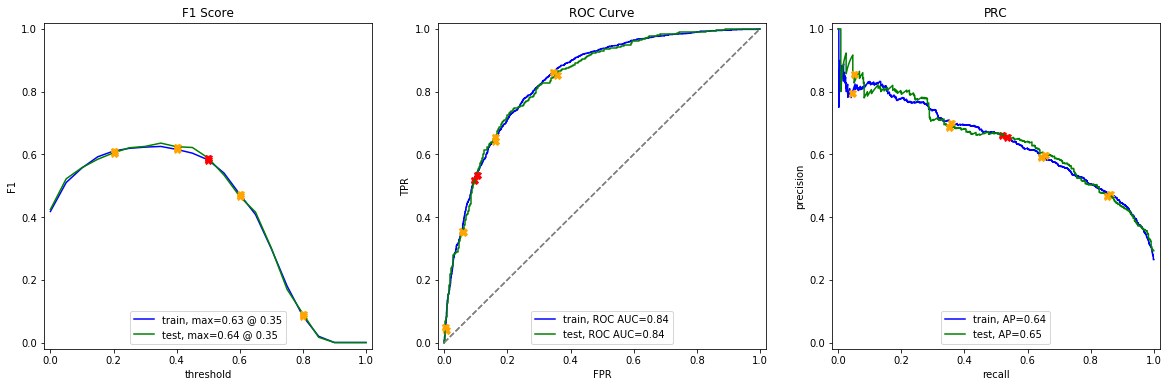

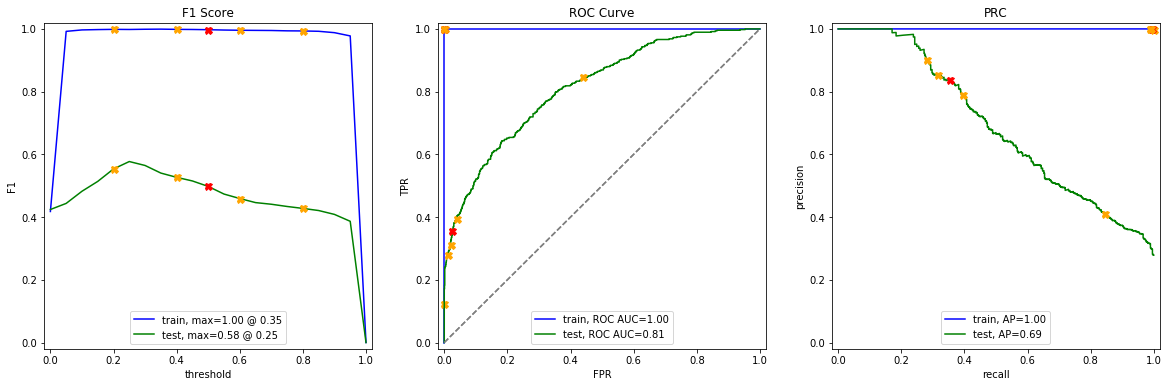

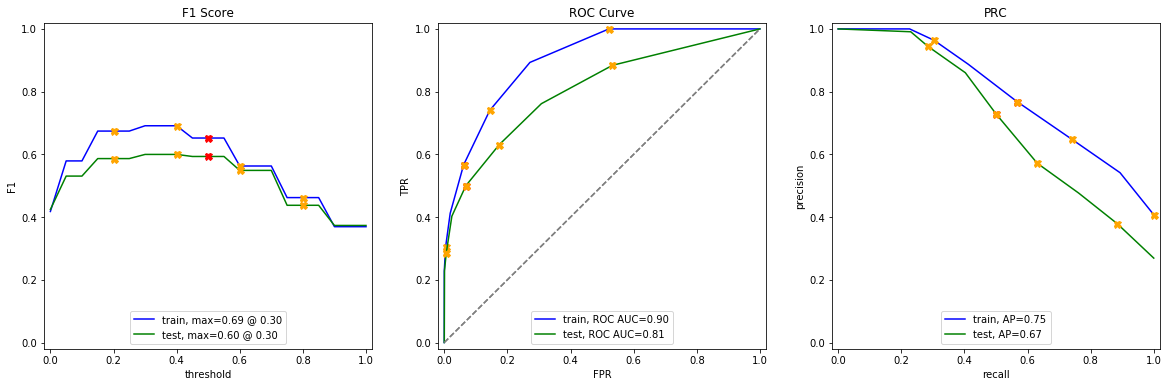

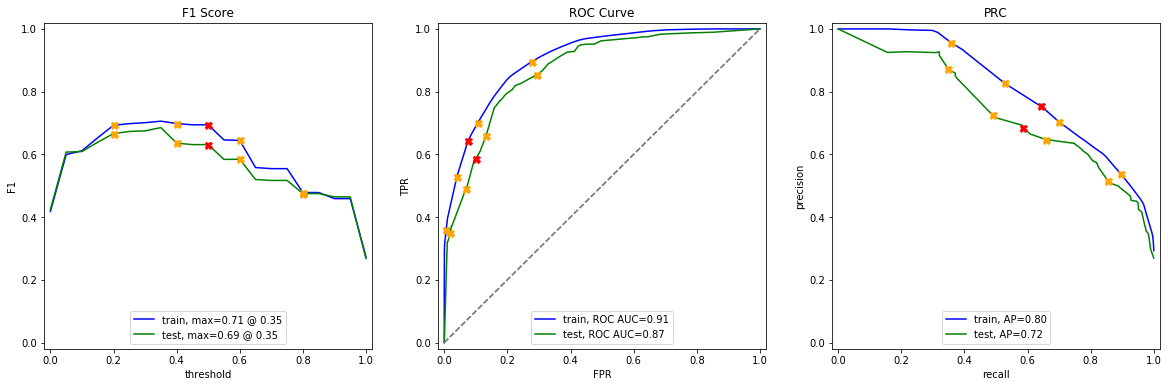

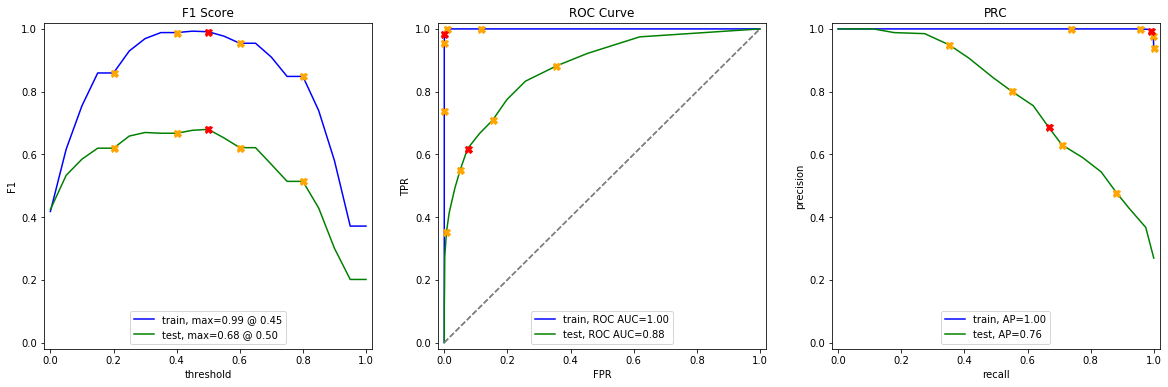

In [96]:
for mod in final_models:
    name = mod[0]
    model = mod[1]
    print(name)
    model.fit(features_1, target_1)
    predicted_test = model.predict(features_test)
    roc_auc = evaluate_model(model, features_1, target_1, features_test, target_test)
    print(name,'ROC-AUC score:', roc_auc)
    print("Confusion Matrix:",confusion_matrix(target_test,predicted_test))
    print('--------------------------------------------------------')

Conclusion
- Random Forest Classifier has best models with ROC-AUC score 88% at test set
- Decision Tree Classifier has ROC-AUC score 87%
- Logistic Regression has ROC-AUC score 84%
- Support Vector Classifier has ROC-AUC score 81%
- KNeighbors Classifier has ROC-AUC score 81%

# Step 9. Overall Conclusion <a class="anchor" id="allconclusion"></a>

- All models have ROC-AUC score at least 81%
- Random Forest Classifier with n_estimators 15 has best models with ROC-AUC score 88%
- followed by Decision Tree Classifier with max_depth 7 has ROC-AUC score 87%
- Random Forest Classifier has better accuracy and F1 score than Decision Tree Classifier.
- False Positive at Random Forest Classifier is lower than Decision Tree Classifier
- False Negative at Random Forest Classifier is lower than Decision Tree Classifier. False Negative is important since we are looking for customers who left the company and don't want to miss them/
- Random Forest Classifier is recommended

# Step 10. Report <a class="anchor" id="report"></a>

- I followed all the work plan, except I added the cross validation after I worked through the project after doing hyperparameter, I just noticed I should do cross validation and put it to the work plan. Also I should do split the data then doing upsampling to balance train data (in the work plan, I put balance data then split the data)
- I kept all the features, in order to find as many as deep connections between them. However I changed categorical features to binary (1 and -1) such as gender, partner, dependents, techsupport, onlinebackup, onlinesecurity, multiplelines,streamingmovies, streamingtv, paperlessbilling, deviceprotection,type, intenetservice, paymentmethod, so  the models can see the correlation with these features
- I got some questions doing the project, however I checked Slack, some students already asked the questions that were in my mind and it's already answered. another challenge was for hyperparameter, I needed to google around or research around what parameters the model had that I could tweak around. 
- The upsampling in the train data (not the whole data set) was nice feedback to solidify the concept (something that I missed before)
- I checked the clustering, also to practice from the previous module/sprint of Unsupervised Learning -> Clustering since there was no project at this module/ sprint, so it's nice to practice in this project, even though clustering didn't generate good results to separate customers who left
- Key to solve the task: 
    - doing data preprocessing: 
        - Join tables based on customerID.
        - fill missing values
        - Convert the data types : dates, float, binary
        - Create the target column: customers who left will be mark as 1 at churn column
    - EDA to check correlation, to explore datetime parameter to check trend customer join and leave
    - Split data
    - Balance data with upsampling train data
    - Training few different models
    - Hyperparameters
    - Cross validation
    - Run the model over the test data


- My best model is Random Forest Classifier with n_estimators 15 and ROC-AUC score 88% on the test set

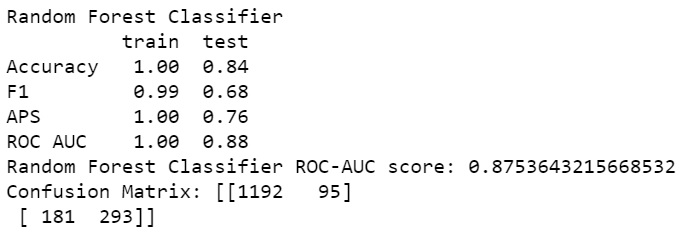

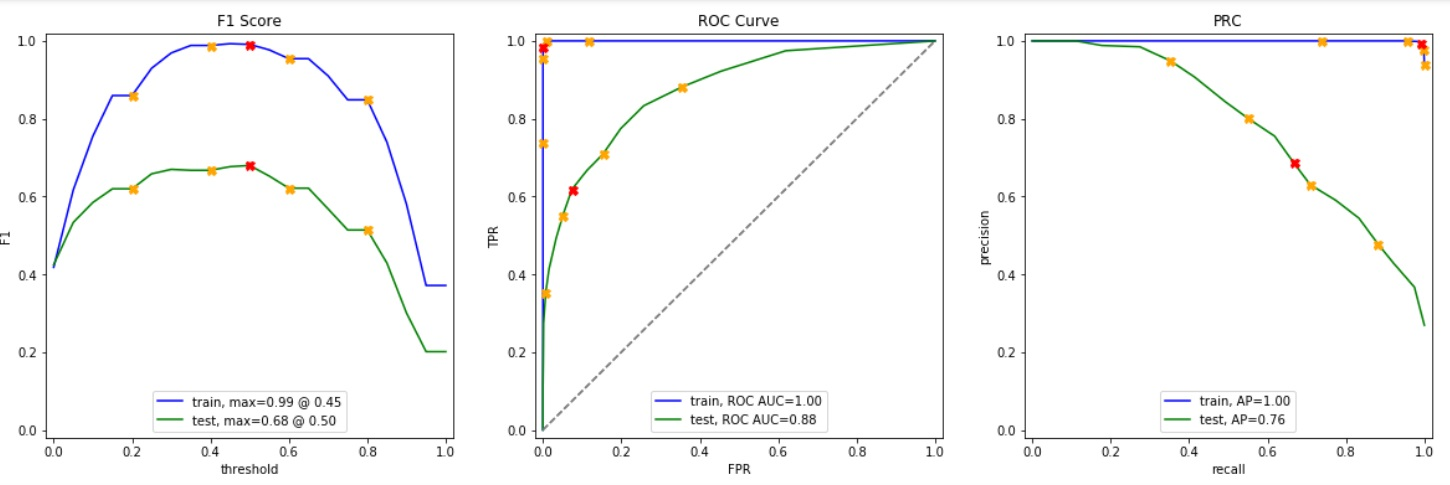